## 数据分析

本节将载入 `data/melb_data.csv`，并针对 Type 进行分类统计与饼图可视化。

### 操作步骤
- 读取原始数据并关注 `Type` 字段；
- 去除缺失 Type 的记录后统计频数；
- 使用饼图展示各 Type 占比。

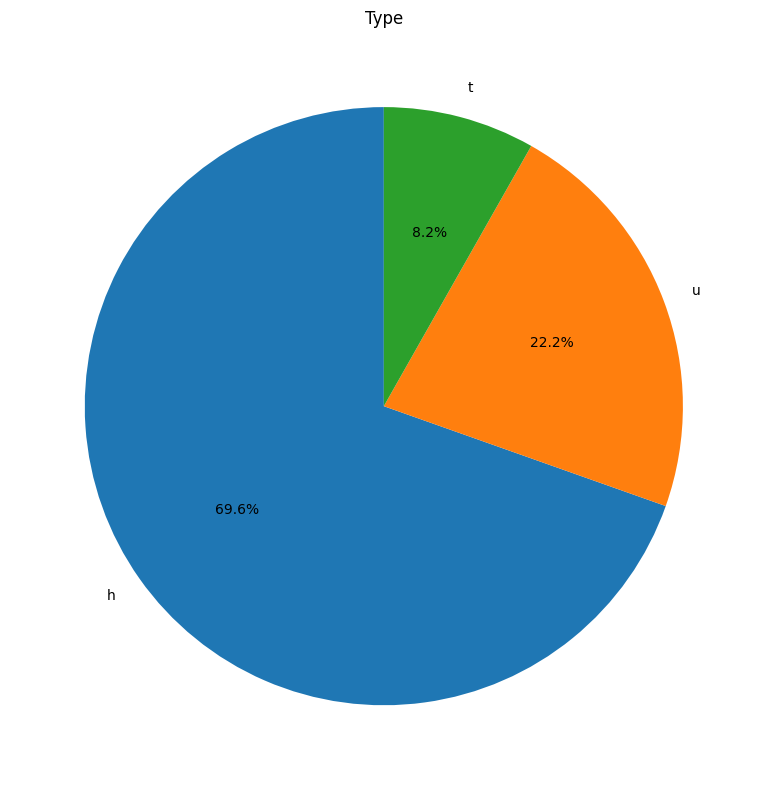

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/melb_data.csv")
Type_counts = df.dropna(subset=["Type"])["Type"].value_counts()

plt.figure(figsize=(8, 8))
Type_counts.plot(
    kind="pie", autopct="%1.1f%%", startangle=90, legend=False
)
plt.ylabel("")
plt.title("Type")
plt.tight_layout()
plt.show()

## 数据分析

本节将载入 `data/melb_data.csv`，并探讨 `Distance` 与 `Price` 之间的关系。

- 读取原始数据并关注 `Distance` 与 `Price` 字段；
- 去除上述字段缺失值，获得可用样本；
- 使用散点图与回归线展示距离与价格的趋势。

/tmp/ipykernel_8570/443397194.py:31: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/443397194.py:31: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/443397194.py:31: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/443397194.py:31: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/443397194.py:31: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/443397194.py:31: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/443397194.py:31: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missi

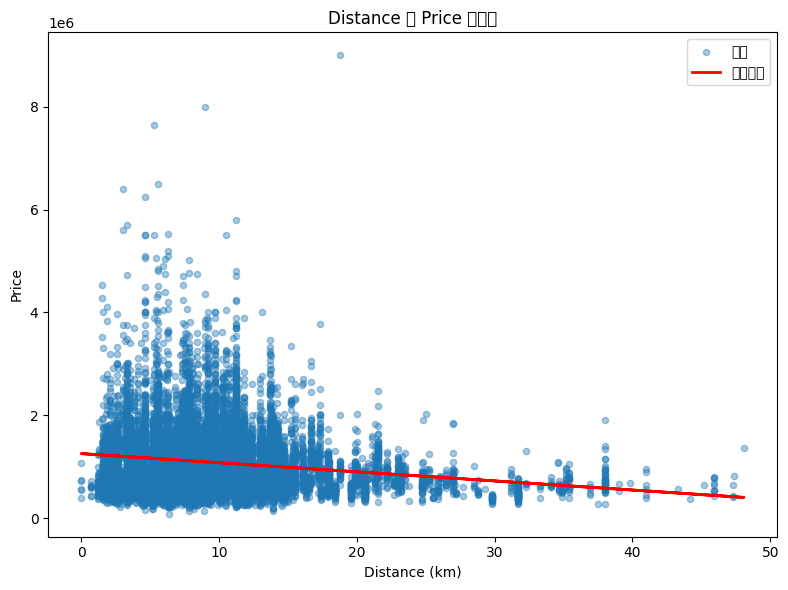

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df = pd.read_csv("data/melb_data.csv")
distance_price = df[["Distance", "Price"]].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(
    distance_price["Distance"],
    distance_price["Price"],
    alpha=0.4,
    s=20,
    label="样本"
)
coeffs = np.polyfit(
    distance_price["Distance"], distance_price["Price"], deg=1
)
plt.plot(
    distance_price["Distance"],
    np.polyval(coeffs, distance_price["Distance"]),
    color="red",
    linewidth=2,
    label="线性趋势"
)
plt.xlabel("Distance (km)")
plt.ylabel("Price")
plt.title("Distance 与 Price 的关系")
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
r, p_value = pearsonr(distance_price["Distance"], distance_price["Price"])
print(f"Distance 与 Price 的皮尔森相关系数: {r}, p-value: {p_value:.4e}")
if p_value < 0.05:
    print("相关性显著")

bins = [0, 5, 10, 20, 40, distance_price["Distance"].max()]
labels = ["0-5km", "5-10km", "10-20km", "20-40km", ">40km"]
distance_price["DistanceBin"] = pd.cut(
    distance_price["Distance"], bins=bins, labels=labels, include_lowest=True
)
avg_price = distance_price.groupby("DistanceBin")["Price"].mean().dropna()
print("\n各距离分组平均房价：")
print(avg_price)

Distance 与 Price 的皮尔森相关系数: -0.1625218378638254, p-value: 4.9965e-81
相关性显著

各距离分组平均房价：
DistanceBin
0-5km      1.132564e+06
5-10km     1.160786e+06
10-20km    1.018714e+06
20-40km    7.409926e+05
>40km      6.472826e+05
Name: Price, dtype: float64


/tmp/ipykernel_8570/3376926122.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = distance_price.groupby("DistanceBin")["Price"].mean().dropna()


### 距离分组均价柱状图
在已有散点与统计结果基础上，进一步用柱状图展示不同距离区间的平均房价，便于比较。

/tmp/ipykernel_8570/1614572336.py:9: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/1614572336.py:9: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/1614572336.py:9: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/1614572336.py:9: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/1614572336.py:9: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/1614572336.py:9: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/1614572336.py:9: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missi

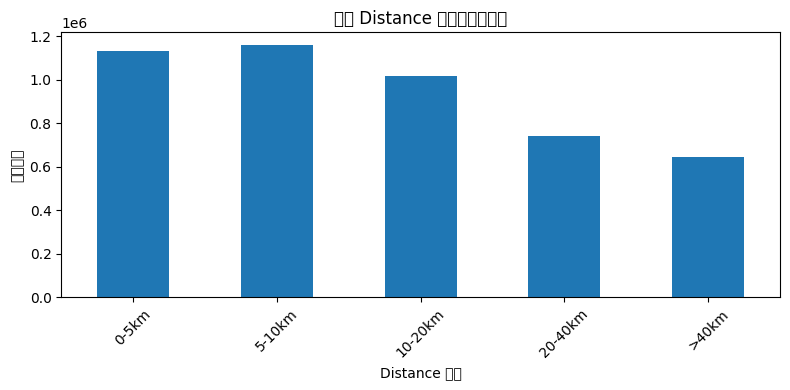

In [5]:
avg_price_sorted = avg_price.sort_index()

plt.figure(figsize=(8, 4))
avg_price_sorted.plot(kind="bar", color="#1f77b4")
plt.xlabel("Distance 区间")
plt.ylabel("平均房价")
plt.title("不同 Distance 区间的平均房价")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Rooms 等房间配置与 Price
围绕 `Rooms`、`Bedroom2`、`Bathroom`、`Car` 与 `Price` 的关系，绘制散点子图并计算相关性。

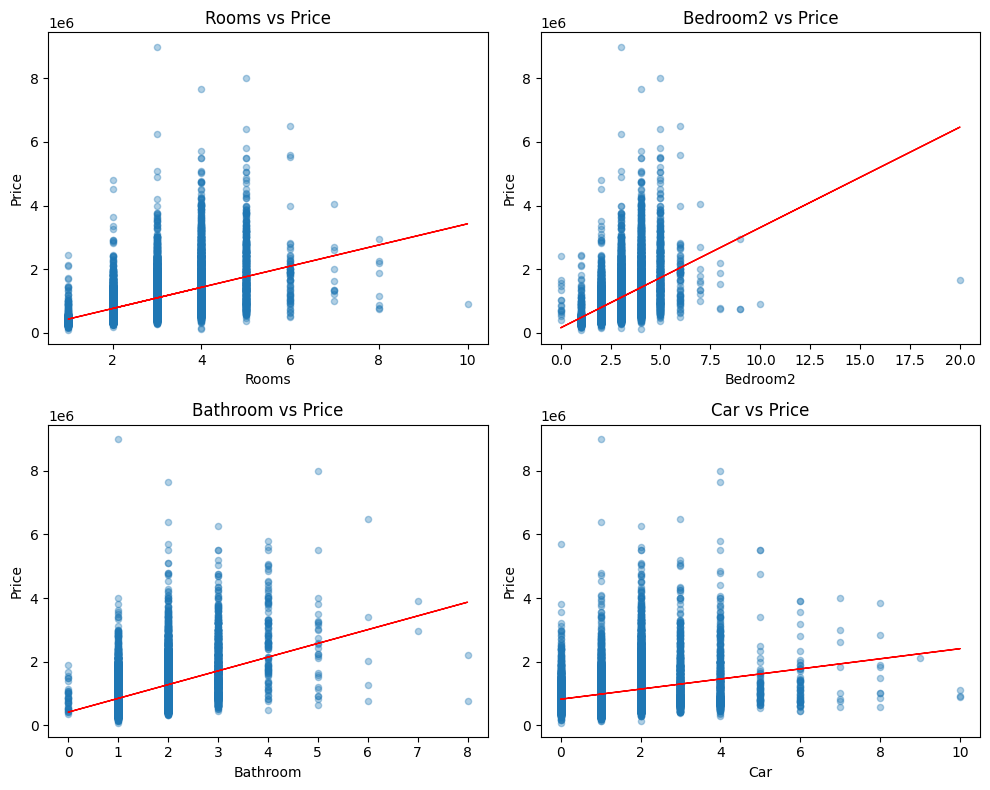

In [6]:
room_features = ["Rooms", "Bedroom2", "Bathroom", "Car"]
rooms_df = df[room_features + ["Price"]].dropna()

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for idx, feature in enumerate(room_features):
    ax = axes[idx // 2, idx % 2]
    ax.scatter(rooms_df[feature], rooms_df["Price"], alpha=0.35, s=20)
    coeff = np.polyfit(rooms_df[feature], rooms_df["Price"], deg=1)
    ax.plot(
        rooms_df[feature],
        np.polyval(coeff, rooms_df[feature]),
        color="red", linewidth=1
    )
    ax.set_xlabel(feature)
    ax.set_ylabel("Price")
    ax.set_title(f"{feature} vs Price")
plt.tight_layout()
plt.show()

In [7]:
corr_series = rooms_df.corr(numeric_only=True)["Price"].drop("Price")
print("房间配置与 Price 的皮尔森相关系数：")
print(corr_series.sort_values(ascending=False))

avg_price_by_rooms = rooms_df.groupby("Rooms")["Price"].mean().sort_index()
print("\n按 Rooms 统计的平均房价（前10个房间数量）：")
print(avg_price_by_rooms.head(10))

房间配置与 Price 的皮尔森相关系数：
Rooms       0.497656
Bedroom2    0.476846
Bathroom    0.467720
Car         0.238979
Name: Price, dtype: float64

按 Rooms 统计的平均房价（前10个房间数量）：
Rooms
1     4.330906e+05
2     7.724822e+05
3     1.074386e+06
4     1.445124e+06
5     1.870260e+06
6     1.849366e+06
7     1.920700e+06
8     1.602750e+06
10    9.000000e+05
Name: Price, dtype: float64


### 房间配置正态分布拟合
为提升房间配置与价格关系的解释性，选取 `Rooms`、`Bedroom2`、`Bathroom`、`Car` 的高频取值，对其对应的价格分布进行正态拟合并对比均值、方差。

/tmp/ipykernel_8570/1295380224.py:37: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/1295380224.py:37: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/1295380224.py:37: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/1295380224.py:37: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/1295380224.py:37: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8570/1295380224.py:37: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/run/media/CandySanjo/E85E61615E612990/Code_Workspace/database/.venv/lib/python3.11/site-packa

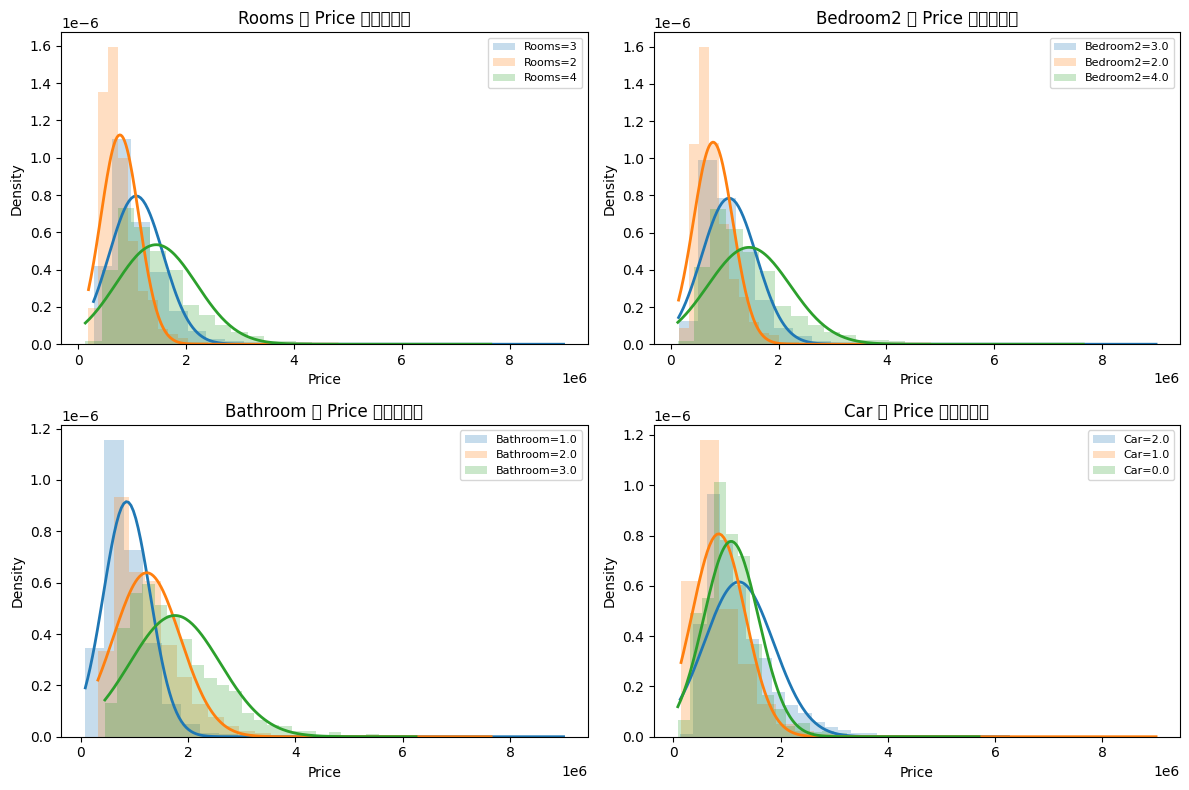

正态拟合参数概览：
     Feature  Value  Samples     MeanPrice       StdPrice
0   Bathroom    1.0     7467  8.575019e+05  435758.852408
1   Bathroom    2.0     4958  1.230627e+06  624729.910111
2   Bathroom    3.0      916  1.755885e+06  845187.572125
3   Bedroom2    2.0     3711  7.852244e+05  367012.572619
4   Bedroom2    3.0     5867  1.080839e+06  507644.947259
5   Bedroom2    4.0     2597  1.452079e+06  765818.359174
6        Car    0.0     1026  1.079088e+06  513503.902361
7        Car    1.0     5509  8.463654e+05  494379.847886
8        Car    2.0     5591  1.222666e+06  647775.956318
9      Rooms    2.0     3622  7.724822e+05  355324.433533
10     Rooms    3.0     5852  1.074386e+06  501473.062910
11     Rooms    4.0     2684  1.445124e+06  747520.519152


In [34]:
from scipy.stats import norm

room_features = ["Rooms", "Bedroom2", "Bathroom", "Car"]
fit_records = []

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
color_cycle = plt.cm.tab10.colors

for idx, feature in enumerate(room_features):
    ax = axes[idx // 2, idx % 2]
    feature_df = rooms_df[[feature, "Price"]].dropna()
    top_values = feature_df[feature].value_counts().index[:3]

    for color, value in zip(color_cycle, top_values):
        subset = feature_df.loc[feature_df[feature] == value, "Price"]
        if subset.size < 10:
            continue
        mu, sigma = norm.fit(subset)
        x = np.linspace(subset.min(), subset.max(), 200)
        ax.hist(
            subset, bins=25, density=True, alpha=0.25, color=color, label=f"{feature}={value}"
        )
        ax.plot(x, norm.pdf(x, mu, sigma), color=color, linewidth=2)
        fit_records.append({
            "Feature": feature,
            "Value": value,
            "Samples": int(subset.size),
            "MeanPrice": mu,
            "StdPrice": sigma
        })

    ax.set_title(f"{feature} 与 Price 的正态拟合")
    ax.set_xlabel("Price")
    ax.set_ylabel("Density")
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

fit_summary = pd.DataFrame(fit_records)
if not fit_summary.empty:
    print("正态拟合参数概览：")
    print(
        fit_summary.sort_values(["Feature", "Value"]).reset_index(drop=True)
    )
else:
    print("可用样本量不足，无法进行正态拟合。")

### Landsize、BuildingArea、YearBuilt 与 Price
补充考察土地面积、建筑面积及建成年份与房价的关系，绘制散点与线性趋势线。

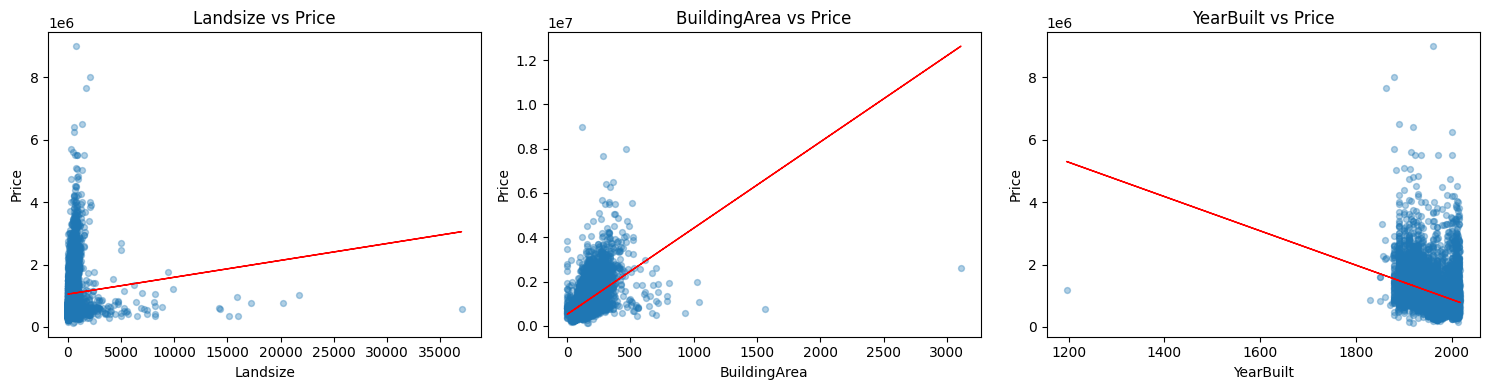

In [35]:
land_features = ["Landsize", "BuildingArea", "YearBuilt"]
land_df = df[land_features + ["Price"]].dropna()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, feature in enumerate(land_features):
    ax = axes[idx]
    ax.scatter(land_df[feature], land_df["Price"], alpha=0.35, s=18)
    coeff = np.polyfit(land_df[feature], land_df["Price"], deg=1)
    ax.plot(
        land_df[feature],
        np.polyval(coeff, land_df[feature]),
        color="red", linewidth=1
    )
    ax.set_xlabel(feature)
    ax.set_ylabel("Price")
    ax.set_title(f"{feature} vs Price")
plt.tight_layout()
plt.show()